# Set up

In [ ]:
# Setup: Import all libraries we'll need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import re

# Display settings for better output
pd.options.display.max_rows = 20
pd.options.display.max_columns = 10

print("📚 Libraries imported - ready for analysis!")


📚 Libraries imported - ready for analysis!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load your cleaned dataset from HW4-1
# If you're in Google Colab, upload your file first:
# from google.colab import files
# uploaded = files.upload()

# Load your data
df = pd.read_csv('/content/drive/MyDrive/WRIT20833/Data/youtube.csv')

print(f"✅ Dataset loaded successfully!")
print(f"Dataset contains {len(df)} items")
print(f"\nColumns available: {df.columns.tolist()}")

✅ Dataset loaded successfully!
Dataset contains 109 items

Columns available: ['style-scope src', 'style-scope', 'yt-simple-endpoint href', 'yt-simple-endpoint', 'yt-simple-endpoint href 3', 'yt-core-attributed-string', 'hidden 2', 'style-scope 3', 'hidden 3', 'yt-core-attributed-string 3', 'yt-core-attributed-string 4', 'style-scope src 3', 'dot']


In [ ]:
 #Enhanced stopwords list (building on HW1)
stopwords = [
    # Basic stopwords from HW1
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers",
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is",
    "are", "was", "were", "be", "been", "being", "have", "has", "had", "having",
    "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or",
    "because", "as", "until", "while", "of", "at", "by", "for", "with", "about",
    "against", "between", "into", "through", "during", "before", "after", "above",
    "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under",
    "again", "further", "then", "once", "here", "there", "when", "where", "why",
    "how", "all", "any", "both", "each", "few", "more", "most", "other", "some",
    "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very",
    "s", "t", "can", "will", "just", "don", "should", "now", "ve", "ll", "amp",

    # Additional common words for cultural data
    "also", "would", "could", "get", "go", "one", "two", "see", "time", "way", "may",
    "said", "say", "new", "first", "last", "long", "little", "much", "well", "still"
]

print(f"✅ Stopwords list loaded: {len(stopwords)} words to filter out")

✅ Stopwords list loaded: 151 words to filter out


In [ ]:
# Text processing functions (building on HW1 approach)
def split_into_words(text):
    """Split text into words (same approach as HW1)"""
    if pd.isna(text):  # Handle missing text
        return []
    lowercase_text = str(text).lower()
    # Split text into words by looking for places where letters/numbers are not present
    split_words = re.split("\\W+", lowercase_text)
    return [word for word in split_words if word]  # Remove empty strings

def clean_for_sentiment(text):
    """Clean text for sentiment analysis (keep punctuation!)"""
    if pd.isna(text):
        return ""
    # Keep punctuation and capitalization - VADER needs them!
    return str(text).strip()

print("✅ Text processing functions ready")

✅ Text processing functions ready


In [ ]:
# Apply text cleaning to your dataset
# Replace 'text_column' with your actual column name

# Create cleaned text for sentiment analysis (keep punctuation)
df['clean_text_sentiment'] = df['yt-core-attributed-string'].apply(clean_for_sentiment)

# Create word lists for term frequency analysis (like HW1)
df['words'] = df['yt-core-attributed-string'].apply(split_into_words)
df['meaningful_words'] = df['yt-core-attributed-string'].apply(lambda word_list: [word for word in word_list if word not in stopwords])

print("✅ Text cleaning complete")
print(f"Sample cleaned text for sentiment: {df['clean_text_sentiment'].iloc[0][:100]}...")
print(f"Sample meaningful words: {df['meaningful_words'].iloc[0][:10]}")


#note: had trouble with replacing text colunm then realized i needed quotations!

✅ Text cleaning complete
Sample cleaned text for sentiment: Do you think Barry should have won the Golden Globe for his performance as Oliver in Saltburn? Or di...
Sample meaningful words: ['D', 'o', ' ', 'y', 'o', 'u', ' ', 'h', 'n', 'k']


# Checkpoint

In [ ]:
# Checkpoint 1: Verify your data loaded correctly
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Replace 'YOUR_TEXT_COLUMN' with your actual text column name
text_column = 'yt-core-attributed-string'  # Fill in your main text column name

print(f"Text column has {df[text_column].isna().sum()} missing values")
print(f"Sample text: {df[text_column].iloc[0][:200]}")

Dataset shape: (109, 16)
Columns: ['style-scope src', 'style-scope', 'yt-simple-endpoint href', 'yt-simple-endpoint', 'yt-simple-endpoint href 3', 'yt-core-attributed-string', 'hidden 2', 'style-scope 3', 'hidden 3', 'yt-core-attributed-string 3', 'yt-core-attributed-string 4', 'style-scope src 3', 'dot', 'clean_text_sentiment', 'words', 'meaningful_words']
Text column has 0 missing values
Sample text: Do you think Barry should have won the Golden Globe for his performance as Oliver in Saltburn? Or did Cillian Murphy deserve it? Let me know your thoughts below!


In [ ]:
# Explore your dataset structure
print("=== DATASET EXPLORATION ===")
print(f"Total entries: {len(df)}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nFirst few rows:")
df.head()

=== DATASET EXPLORATION ===
Total entries: 109

Data types:
style-scope src                 object
style-scope                     object
yt-simple-endpoint href         object
yt-simple-endpoint              object
yt-simple-endpoint href 3       object
yt-core-attributed-string       object
hidden 2                        object
style-scope 3                  float64
hidden 3                        object
yt-core-attributed-string 3     object
yt-core-attributed-string 4     object
style-scope src 3               object
dot                             object
clean_text_sentiment            object
words                           object
meaningful_words                object
dtype: object

First few rows:


,style-scope src,style-scope,yt-simple-endpoint href,yt-simple-endpoint,yt-simple-endpoint href 3,...,style-scope src 3,dot,clean_text_sentiment,words,meaningful_words
0,https://yt3.ggpht.com/ytc/AIdro_lrKq0I87GeJzWb...,Pinned by @BrainPilot,https://www.youtube.com/@BrainPilot,1 year ago,https://www.youtube.com/watch?v=FtNxhoottlU&lc...,...,NaN,NaN,Do you think Barry should have won the Golden ...,"[do, you, think, barry, should, have, won, the...","[D, o, , y, o, u, , h, n, k, , B, r, r, y, ..."
1,https://yt3.ggpht.com/ytc/AIdro_lJpgF_tqjidtL6...,@winnerA,https://www.youtube.com/@winnerA,1 year ago,https://www.youtube.com/watch?v=FtNxhoottlU&lc...,...,NaN,NaN,Unpopular opinion: his plan to inherit salburn...,"[unpopular, opinion, his, plan, to, inherit, s...","[U, n, p, o, p, u, l, r, , o, p, n, o, n, :, ..."
2,https://yt3.ggpht.com/vXTh3bCzVjXtt0lOkYkXHAcr...,@froufroudeluxe,https://www.youtube.com/@froufroudeluxe,1 year ago,https://www.youtube.com/watch?v=FtNxhoottlU&lc...,...,NaN,NaN,This movie has me in a chokehold,"[this, movie, has, me, in, a, chokehold]","[T, h, , m, o, v, e, , h, , m, e, , n, , ..."
3,https://yt3.ggpht.com/pHtnQPou8pNycZOXskJnOw3Q...,@Jackntherippers,https://www.youtube.com/@Jackntherippers,1 year ago,https://www.youtube.com/watch?v=FtNxhoottlU&lc...,...,NaN,NaN,I will have to politely disagree after watchin...,"[i, will, have, to, politely, disagree, after,...","[I, , w, l, l, , h, v, e, , o, , p, o, l, ..."
4,https://yt3.ggpht.com/ytc/AIdro_kgpoo4vRQWZ7v_...,@squamish4244,https://www.youtube.com/@squamish4244,1 year ago,https://www.youtube.com/watch?v=FtNxhoottlU&lc...,...,NaN,NaN,Sometimes psychopaths are just psychopaths. A ...,"[sometimes, psychopaths, are, just, psychopath...","[S, o, m, e, m, e, , p, y, c, h, o, p, h, , ..."


# Vader Downlaod

In [ ]:
# Install and import VADER
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

print("✅ VADER installed and ready for sentiment analysis!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.8 MB/s eta 0:00:00
✅ VADER installed and ready for sentiment analysis!


In [ ]:
# Checkpoint 3: VADER setup
test_text = "i LOVE LOVE LOVE this movie!!!!!!"
test_result = analyzer.polarity_scores(test_text)
print(f"Test text: {test_text}")
print(f"VADER result: {test_result}")
# Should see: {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6588} (or similar)
#I played with the test text to see the differing sentiment scores

Test text: i LOVE LOVE LOVE this movie!!!!!!
VADER result: {'neg': 0.0, 'neu': 0.158, 'pos': 0.842, 'compound': 0.9582}


# Saltburn sentiment analysis

In [ ]:
# Apply sentiment analysis to your entire dataset
def get_sentiment_score(text):
    """Get compound sentiment score for a text"""
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Apply sentiment analysis to your entire dataset
df['sentiment_score'] = df['yt-core-attributed-string'].apply(get_sentiment_score) # Fill in: what function?

print("✅ Sentiment analysis complete for entire dataset!")
print(f"\nSentiment score range: {df['sentiment_score'].min():.3f} to {df['sentiment_score'].max():.3f}")
print(f"Average sentiment: {df['sentiment_score'].mean():.3f}")

✅ Sentiment analysis complete for entire dataset!

Sentiment score range: -0.988 to 0.993
Average sentiment: 0.067


In [ ]:
# Analyze sentiment patterns in your data
print("🎭 SENTIMENT ANALYSIS SUMMARY")
print("=" * 35)

# Basic statistics
print(f"Total entries analyzed: {len(df)}")
print(f"Average sentiment: {df['sentiment_score'].mean():.3f}")
print(f"Most positive entry: {df['sentiment_score'].max():.3f}")
print(f"Most negative entry: {df['sentiment_score'].min():.3f}")
print(f"Standard deviation: {df['sentiment_score'].std():.3f}")

# Categorize sentiments
positive = len(df[df['sentiment_score'] > 0.1])
neutral = len(df[(df['sentiment_score'] >= -0.1) & (df['sentiment_score'] <= 0.1)])
negative = len(df[df['sentiment_score'] < -0.1])

print(f"\nSentiment distribution:")
print(f"Positive (>0.1): {positive} ({positive/len(df)*100:.1f}%)")
print(f"Neutral (-0.1 to 0.1): {neutral} ({neutral/len(df)*100:.1f}%)")
print(f"Negative (<-0.1): {negative} ({negative/len(df)*100:.1f}%)")

🎭 SENTIMENT ANALYSIS SUMMARY
Total entries analyzed: 109
Average sentiment: 0.067
Most positive entry: 0.993
Most negative entry: -0.988
Standard deviation: 0.540

Sentiment distribution:
Positive (>0.1): 43 (39.4%)
Neutral (-0.1 to 0.1): 34 (31.2%)
Negative (<-0.1): 32 (29.4%)


In [ ]:
# Find most positive and negative examples
most_positive = df.loc[df['sentiment_score'].idxmax()]
most_negative = df.loc[df['sentiment_score'].idxmin()]

print(f"📈 MOST POSITIVE ENTRY (score: {most_positive['sentiment_score']:.3f}):")
print(f"Text: {most_positive['yt-core-attributed-string'][:2000000]}...")
print()
print(f"📉 MOST NEGATIVE ENTRY (score: {most_negative['sentiment_score']:.3f}):")
print(f"Text: {most_negative['yt-core-attributed-string'][:20000000]}...")



📈 MOST POSITIVE ENTRY (score: 0.993):
Text: Have you watched the film? Because you haven't understood it. That's the simpler bit because it is harder to diagnose ClusterB ASPD (aka psychopathy and/or sociopathy) than you superficially intend to prove here.

Quick didn't set out to get Saltburn as stated. It was a by-product of a chain of events starting on his birthday. Quick's first murders were to prevent his true shallow, lying self from being revealled. There were not part of a masterplan to acquire an English country house. Indeed the film totally fails to explain how really this occurred. becase as the director makes clear the film is about love.

So, by definition the lead Quick is not an empathy empty ClusterB type. As repeatedly shown in the film Quick is well able to display love most notably in the bathroom and grave scenes. An ASPD personality would have demonstrated sorrow for these losses publicly i.e. at the funeral not privately at the grave. An ASPD's emotions for loss

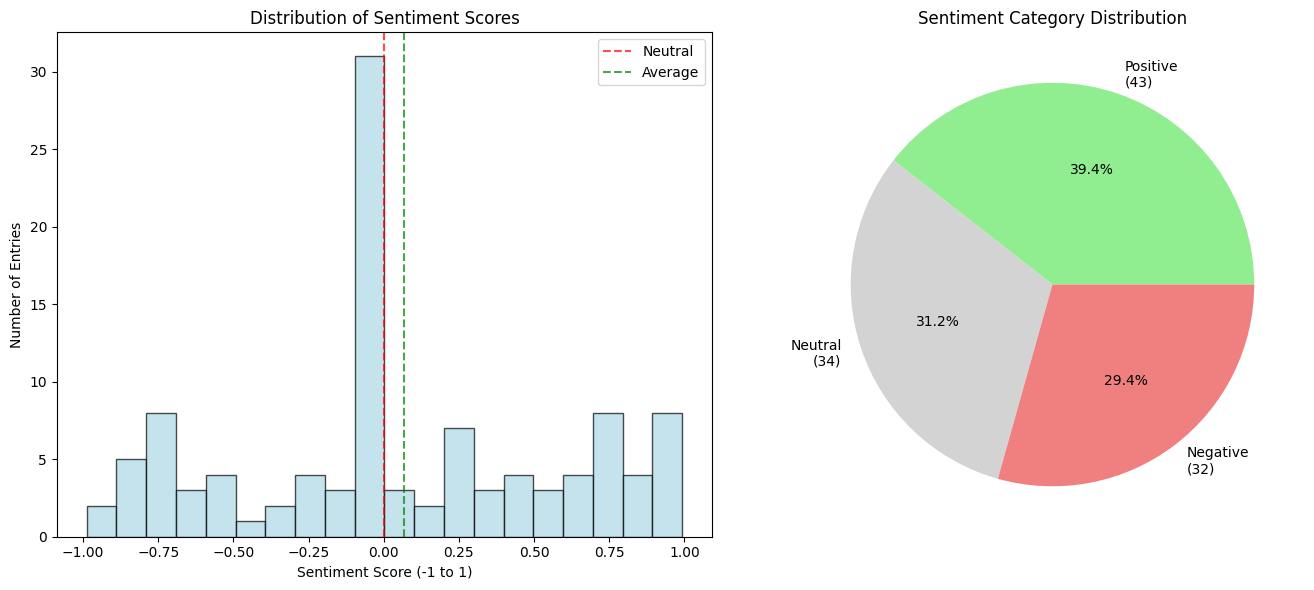

In [ ]:
 #Create sentiment visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Sentiment distribution histogram
axes[0].hist(df['sentiment_score'], bins=20, color='lightblue', alpha=0.7, edgecolor='black')
axes[0].set_title('Distribution of Sentiment Scores')
axes[0].set_xlabel('Sentiment Score (-1 to 1)')
axes[0].set_ylabel('Number of Entries')
axes[0].axvline(0, color='red', linestyle='--', alpha=0.7, label='Neutral')
axes[0].axvline(df['sentiment_score'].mean(), color='green', linestyle='--', alpha=0.7, label='Average')
axes[0].legend()

# Sentiment categories pie chart
sentiment_counts = [positive, neutral, negative]
sentiment_labels = [f'Positive\n({positive})', f'Neutral\n({neutral})', f'Negative\n({negative})']
colors = ['lightgreen', 'lightgray', 'lightcoral']

axes[1].pie(sentiment_counts, labels=sentiment_labels, colors=colors, autopct='%1.1f%%')
axes[1].set_title('Sentiment Category Distribution')

plt.tight_layout()
plt.show()


# Human vs. Automated Sentiment Check

In [ ]:
# Sample 5 entries for human vs. VADER comparison
sample_entries = df.sample(5)

print("🧠 HUMAN vs. VADER SENTIMENT COMPARISON")
print("=" * 45)
print("Read each text below and judge its sentiment, then compare to VADER's score:\n")

for i, (idx, row) in enumerate(sample_entries.iterrows(), 1):
    print(f"Text {i}:")
    print(f"'{row['yt-core-attributed-string'][:1000000]}...'")
    print(f"VADER Score: {row['sentiment_score']:.3f}")
    print(f"Your Human Judgment: _____ (Positive/Neutral/Negative)")
    print(f"Agreement? _____ (Yes/No - explain any differences)")
    print()

🧠 HUMAN vs. VADER SENTIMENT COMPARISON
Read each text below and judge its sentiment, then compare to VADER's score:

Text 1:
'Psychopathy and Sociopathy is different. Psychopaths are born, sociopaths are made...I believe Ollie was born that way, sociopaths would have a degree of remorse, Ollie didn't have any. His lies, jealousy, manipulation, grandiosity, narcissism is clear to see....'
VADER Score: -0.700
Your Human Judgment: _____ (Positive/Neutral/Negative)
Agreement? _____ (Yes/No - explain any differences)

Text 2:
'Do you think he knew about saltburn from the beginning and wanted it or he firstly wanted the friendship and when it failed he wanted the house...'
VADER Score: -0.103
Your Human Judgment: _____ (Positive/Neutral/Negative)
Agreement? _____ (Yes/No - explain any differences)

Text 3:
'“Ollie had Venetia under his thumb” in more than one way...'
VADER Score: 0.000
Your Human Judgment: _____ (Positive/Neutral/Negative)
Agreement? _____ (Yes/No - explain any differences)


# Final Insights for Rotten Tomatoes


**negative sentiment**


**positive sentiment**


**overall sentiment**


**broader impact**